In [ ]:
import pandas as pd
import numpy as np
import requests
## conda install -c conda-forge scrapy
from bs4 import BeautifulSoup
#Beautiful Soup is used to parse and prettify raw web data
from collections import Counter
## pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import time

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
## Get the data
url = "https://theconversation.com/three-reasons-the-us-doesnt-have-universal-health-coverage-67292"

# mimic a browser (alt is Mozilla/5.0 (platform; rv:gecko-version) Gecko/gecko-trail Firefox/firefox-version)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    # Send request to the URL
    res = requests.get(url, headers=headers)

    # get data if it permits it
    if res.status_code == 200:
        htmlData = res.content
        print(htmlData)
    else:
        print(f"Error: {res.status_code} - {res.reason}")

except Exception as e:
    print(f"Request failed: {e}")

# Use time precaution to avoid overwhelming server, mimic a person's browsing
time.sleep(5)

b'<!DOCTYPE html>\n<html lang="en-EUROPE" class="no-js">\n<head>\n  \n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta name="theme-color" content="#d8352a">\n  <meta name="msapplication-navbutton-color" content="#d8352a">\n  <meta charset="utf-8">\n  <meta property="fb:app_id" content="127105130696839">\n  <meta name="current-region" content="europe">\n  <meta http-equiv="Content-Language" content="en-EUROPE">\n  <meta name="description" content="As Obamacare premium prices rise, many are asking why the U.S. doesn\xe2\x80\x99t have universal health care in the first place. The reasons may surprise you." />\n<meta name="pubdate" content="20161026" />\n<meta name="commissioning-region" content="us" />\n<meta name="searchtype" content="analysis" />\n<meta name="original-source" content="https://theconversation.com/three-reasons-the-us-doesnt-have-universal-health-coverage-67292" />\n<meta name="news_keywords" content="2016 US presidential election, Donald Tr

In [ ]:
## Parse the Data
parsedData = BeautifulSoup(htmlData, "html.parser")
#there are other parsers as well, like lxml or html5lib
print(parsedData.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en-EUROPE">
 <head>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="#d8352a" name="theme-color"/>
  <meta content="#d8352a" name="msapplication-navbutton-color"/>
  <meta charset="utf-8"/>
  <meta content="127105130696839" property="fb:app_id"/>
  <meta content="europe" name="current-region"/>
  <meta content="en-EUROPE" http-equiv="Content-Language"/>
  <meta content="As Obamacare premium prices rise, many are asking why the U.S. doesn’t have universal health care in the first place. The reasons may surprise you." name="description">
   <meta content="20161026" name="pubdate">
    <meta content="us" name="commissioning-region">
     <meta content="analysis" name="searchtype">
      <meta content="https://theconversation.com/three-reasons-the-us-doesnt-have-universal-health-coverage-67292" name="original-source">
       <meta content="2016 US presidential election, Donald Trump, Health care costs, Health

In [ ]:
texts = parsedData.findAll(text=True)
print(texts)

['html', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', "\n  window.PAGE_CONFIG = {\n    content_id: 67292,\n    content_slug: 'three-reasons-the-us-doesnt-have-universal-health-coverage-67292',\n    comments_closed_at: '2022-09-13T07:02:22Z',\n    subscriptionOptions: {},\n    promos_context: {\n      topic_ids: [431, 989, 2402, 3321, 10206, 21853, 23653, 32546],\n      section_ids: [3232, 3237],\n      section_slugs: [],\n      collaborator_ids: [262472, 310063],\n      content_language: 'en',\n    }\n  }\n", '\n', '\n    window.GTM = window.GTM || {}\n    window.GTM.pageType = "article"\n    window.GTM.ArticleData = {"article_id":"67292","article_tags":"2016 US presidential election|Donald Trump|Health care costs|Health insurance|Health policy|Hillary Clinton|Obamacare|universal healthcare","article_type":"free","author_id":"310063","author

<ipython-input-7-8d6f4dcd74ed>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  texts = parsedData.findAll(text=True)


In [ ]:
#Getting the title of the HTML page.
print(parsedData.title)
print(parsedData.title.string)

<title>Three reasons the US doesn’t have universal health coverage</title>
Three reasons the US doesn’t have universal health coverage


In [ ]:
body = parsedData.find('body')
# Extract the text
text = body.get_text()
print(type(text))
MyList=text.split()
print(MyList)

<class 'str'>
['Menu', 'Close', 'Home', 'Edition', 'Africa', 'Australia', 'Brasil', 'Canada', 'Canada', '(français)', 'España', 'Europe', 'France', 'Global', 'Indonesia', 'New', 'Zealand', 'United', 'Kingdom', 'United', 'States', 'Edition:', 'Available', 'editions', 'Europe', 'Africa', 'Australia', 'Brasil', 'Canada', 'Canada', '(français)', 'España', 'France', 'Global', 'Indonesia', 'New', 'Zealand', 'United', 'Kingdom', 'United', 'States', 'Get', 'newsletter', 'Become', 'an', 'author', 'Sign', 'up', 'as', 'a', 'reader', 'Sign', 'in', 'Search', 'Academic', 'rigour,', 'journalistic', 'flair', 'Three', 'reasons', 'the', 'US', 'doesn’t', 'have', 'universal', 'health', 'coverage', 'Published:', 'October', '26,', '2016', '5.24am', 'CEST', 'Timothy', 'Callaghan,', 'Texas', 'A&M', 'University', 'Author', 'Timothy', 'Callaghan', 'Assistant', 'Professor,', 'Texas', 'A&M', 'University', 'Health', 'Science', 'Center,', 'Texas', 'A&M', 'University', 'Disclosure', 'statement', 'Timothy', 'Callagha

In [ ]:
##filter the list
MyList = [item for item in MyList if item.isalpha()]
print(MyList)
MyList = [item for item in MyList if len(item) > 3]
print(MyList)
MyList=[x.lower() for x in MyList]
print(MyList)
StopWords=["website", "websites", "href", "this", "from", 'is', 'and', 'a', 'are', 'to', 'there', 'that', 'menu', 'close', 'have', 'they', 'with', 'these', 'because']
MyList = [word for word in MyList if word not in StopWords]
print(MyList)
word_counts = Counter(MyList)
print(word_counts)
print(type(word_counts))

['home', 'edition', 'africa', 'australia', 'brasil', 'canada', 'canada', 'españa', 'europe', 'france', 'global', 'indonesia', 'zealand', 'united', 'kingdom', 'united', 'states', 'available', 'editions', 'europe', 'africa', 'australia', 'brasil', 'canada', 'canada', 'españa', 'france', 'global', 'indonesia', 'zealand', 'united', 'kingdom', 'united', 'states', 'newsletter', 'become', 'author', 'sign', 'reader', 'sign', 'search', 'academic', 'journalistic', 'flair', 'three', 'reasons', 'have', 'universal', 'health', 'coverage', 'october', 'cest', 'timothy', 'texas', 'university', 'author', 'timothy', 'callaghan', 'assistant', 'texas', 'university', 'health', 'science', 'texas', 'university', 'disclosure', 'statement', 'timothy', 'callaghan', 'does', 'work', 'shares', 'receive', 'funding', 'company', 'organisation', 'would', 'benefit', 'disclosed', 'relevant', 'affiliations', 'beyond', 'their', 'academic', 'partners', 'texas', 'university', 'provides', 'funding', 'founding', 'partner', 'co

In [ ]:
# Convert to DataFrame
MyDF = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
# Reset index to make 'a', 'b', 'c' a column
MyDF.reset_index(inplace=True)
MyDF.columns = ['word', 'count']
print(MyDF)
print(type(MyDF))

                word  count
0               home      1
1            edition      1
2             africa      2
3          australia      2
4             brasil      2
5             canada      4
6             españa      2
7             europe      2
8             france      3
9             global      2
10         indonesia      2
11           zealand      2
12            united      8
13           kingdom      2
14            states      5
15         available      1
16          editions      1
17        newsletter      2
18            become      1
19            author      2
20              sign      2
21            reader      1
22            search      1
23          academic      2
24      journalistic      1
25             flair      1
26             three      2
27           reasons      1
28         universal     12
29            health     26
30          coverage      9
31           october      1
32              cest      1
33           timothy      3
34             texas

In [ ]:
## Create a word cloud
word_freq = dict(zip(MyDF['word'], MyDF['count']))
print(word_freq)

{'home': 1, 'edition': 1, 'africa': 2, 'australia': 2, 'brasil': 2, 'canada': 4, 'españa': 2, 'europe': 2, 'france': 3, 'global': 2, 'indonesia': 2, 'zealand': 2, 'united': 8, 'kingdom': 2, 'states': 5, 'available': 1, 'editions': 1, 'newsletter': 2, 'become': 1, 'author': 2, 'sign': 2, 'reader': 1, 'search': 1, 'academic': 2, 'journalistic': 1, 'flair': 1, 'three': 2, 'reasons': 1, 'universal': 12, 'health': 26, 'coverage': 9, 'october': 1, 'cest': 1, 'timothy': 3, 'texas': 4, 'university': 4, 'callaghan': 2, 'assistant': 1, 'science': 1, 'disclosure': 1, 'statement': 1, 'does': 1, 'work': 1, 'shares': 1, 'receive': 1, 'funding': 2, 'company': 2, 'organisation': 1, 'would': 3, 'benefit': 1, 'disclosed': 1, 'relevant': 1, 'affiliations': 1, 'beyond': 1, 'their': 3, 'partners': 3, 'provides': 1, 'founding': 1, 'partner': 1, 'conversation': 2, 'view': 1, 'bernie': 2, 'sanders': 1, 'fans': 1, 'gather': 1, 'recent': 2, 'rally': 1, 'support': 2, 'associated': 2, 'press': 2, 'copy': 1, 'link

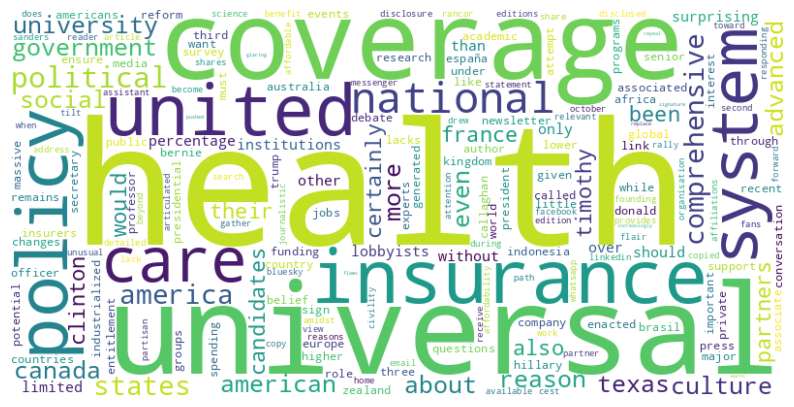

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(word_freq)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Download dataframe as a csv file for saving later
MyDF.to_csv('HealthcareBlog.csv', index = False)